---

#<h2 style="text-align: center;"><b>НС из одного нейрона</b></h3>

---

##<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Здесь самое время напомнить о том, какие вещи играют принципиальную роль в построении любой ***нейронной сети*** (все их мы задаём *руками*, самостоятельно):  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество **эпох** обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

##<h3 style="text-align: center;"><b>Один нейрон на Keras</b></h3>

Данные пока что возьмём как и прежде -- "яблоки и груши":

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("apples_pears.csv")

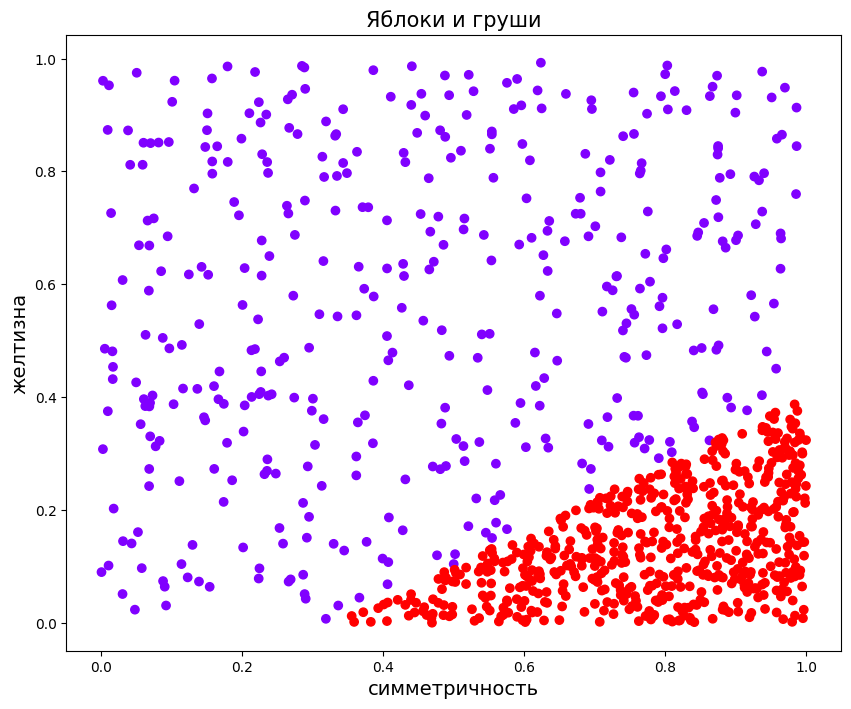

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [15]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid

In [17]:
X[:,:10]

array([[0.77942731, 0.25730527],
       [0.77700501, 0.0159154 ],
       [0.97709225, 0.30420962],
       ...,
       [0.92721921, 0.13498618],
       [0.01582991, 0.48132194],
       [0.96796389, 0.30857107]], shape=(1000, 2))

In [18]:
num_features = X.shape[1]

neuron = Sequential()
neuron.add(Dense(1, input_shape=(num_features,), activation=sigmoid))



/home/daniil/study/nn-course/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
neuron

<Sequential name=sequential_1, built=True>

Пока что мы просто создали объект класса `Sequential`, который состоит из одного линейного слоя размерности (num_features, 1) и последующего применения сигмоиды. Но уже сейчас его можно применить к объекту (тензору), просто веса в начале инициализирутся случайно и при forward_pass'е мы получим какой-то ответ пока что необученного нейрона:

In [20]:
import numpy as np
neuron.predict(np.array([[1, 1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.6125634]], dtype=float32)

Предскажем ещё необученным нейроном:

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step
[[False]
 [False]
 [False]
 [ True]
 [False]]


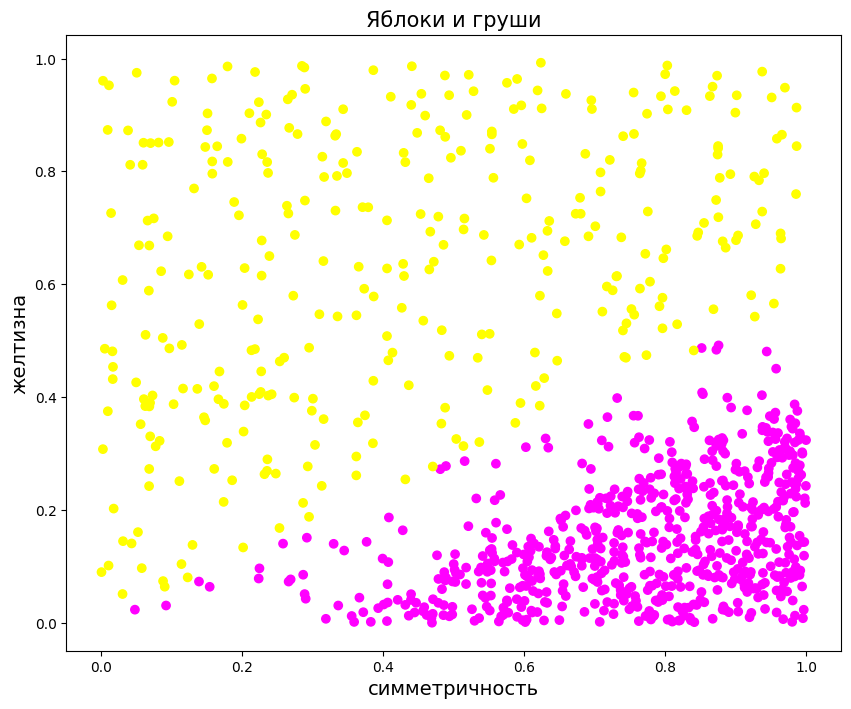

In [21]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
print(y_pred[:5])
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Как и ожидалось, ничего полезного. Давайте научим нейрон отличать груши от яблок по их симметричности и желтизне!

##Код обучения одного нейрона на Keras:

In [22]:
from keras import optimizers
sgd = optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.01)
neuron.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=100, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/100


/home/daniil/study/nn-course/.venv/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0575 - loss: 0.3292 - val_accuracy: 0.1050 - val_loss: 0.3192
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3413 - loss: 0.3045 - val_accuracy: 0.5650 - val_loss: 0.2976
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5888 - loss: 0.2864 - val_accuracy: 0.5800 - val_loss: 0.2811
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5900 - loss: 0.2719 - val_accuracy: 0.5800 - val_loss: 0.2675
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.5900 - loss: 0.2592 - val_accuracy: 0.5800 - val_loss: 0.2541
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.5900 - loss: 0.2468 - val_accuracy: 0.5800 - val_loss: 0.2415
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5900 - loss: 0.2350 - val_accuracy: 0.5800 - val_loss: 0.2291
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5900 - loss: 0.2236 - val_accuracy: 0.5800 - val_loss:

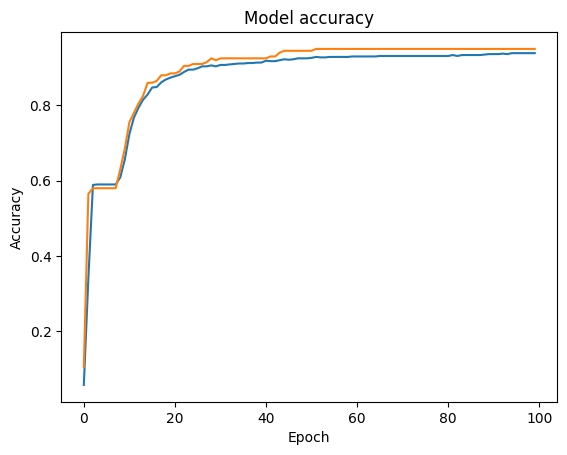

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train','test'])
plt.show()




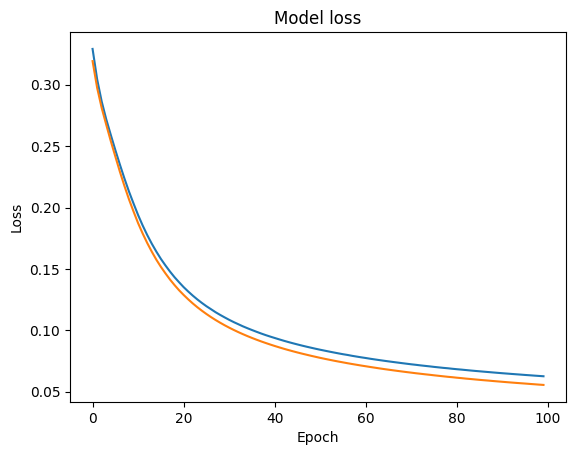

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Обучили. Предскажем теперь:

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


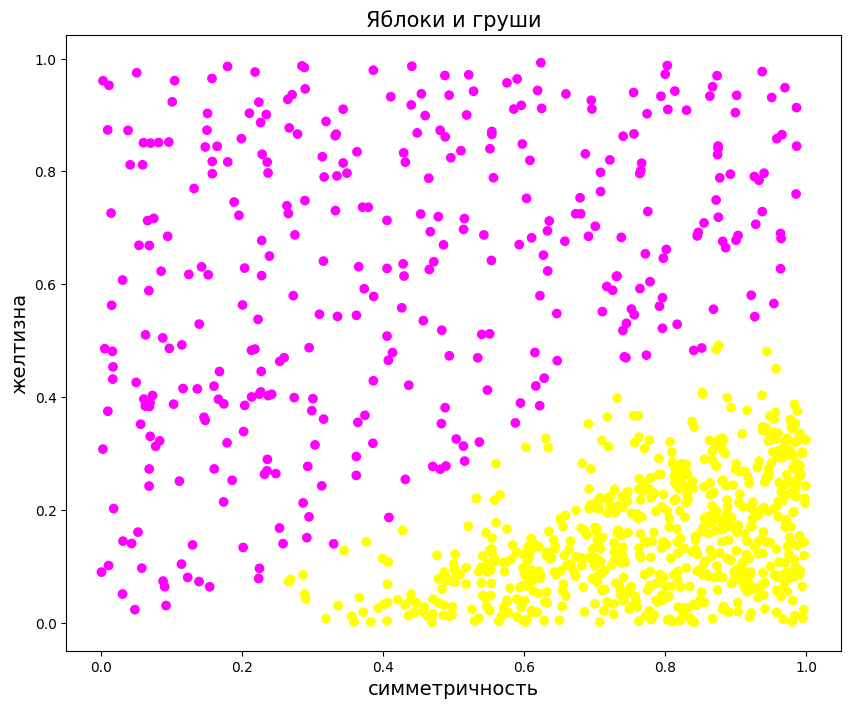

In [25]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Можно добиться лучшего качества работы путём изменения `learning_rate` и количества эпох (возможно, ещё функции потерь и функции активации). 
#Задание 1
Проанализировать влияние следующих параметров на качество обучения модели: скорость обучения, количество эпох, виды оптимизаторов.
Результаты анализа представить в виде графиков (диаграмм)   

---

Нейрон работет, отличает яблоки от груш. Давайте попробуем более сложную выборку, которая уже не разделяется линейно:

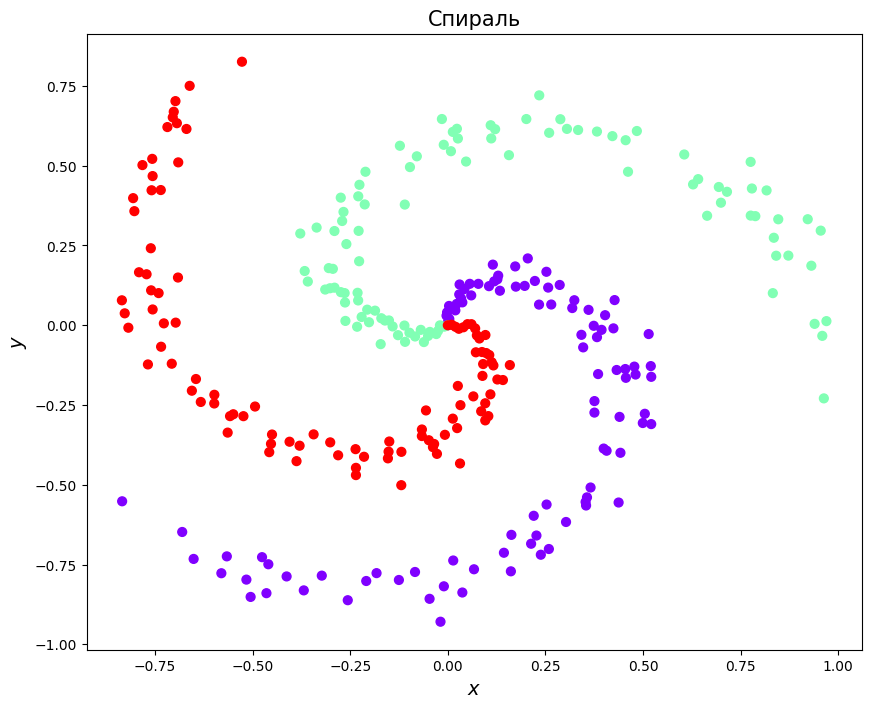

In [26]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Данные в Variable():

In [27]:
print(X.data.shape, y.data.shape)

(300, 2) (300,)


Попробуем нейрон с сигмоидой на линейно неразделимой выборке:

In [28]:
num_features = X.shape[1]

neuron = Sequential()
neuron.add(Dense(1, input_shape=(num_features,), activation=sigmoid))
sgd = optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.0001)
neuron.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=200, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2292 - loss: 0.5978 - val_accuracy: 0.0000e+00 - val_loss: 2.6252
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2292 - loss: 0.5978 - val_accuracy: 0.0000e+00 - val_loss: 2.6251
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2333 - loss: 0.5978 - val_accuracy: 0.0000e+00 - val_loss: 2.6248
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2333 - loss: 0.5977 - val_accuracy: 0.0000e+00 - val_loss: 2.6246
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2333 - loss: 0.5977 - val_accuracy: 0.0000e+00 - val_loss: 2.6243
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2250 - loss: 0.5977 - val_accuracy: 0.0000e+00 - val_loss: 2.6240
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2250 - loss: 0.5976 - val_accuracy: 0.0000e+00 - val_loss: 2.6237
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2250 - loss: 0.5975 - val_accurac

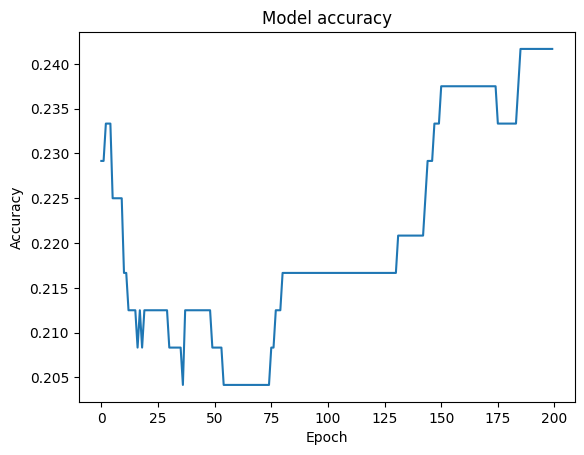

In [29]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Не слишком впечатляет. 

#Задание 2
Попробовать улучшить результат за счет изменения следующих параметров: скорость обучения, количество эпох, виды оптимизаторов.
Результаты анализа представить в виде графиков (диаграмм)   

Большего улучшения добиться не получиться. Поэтому попробуем применить многослойную нейросеть в следующем ноутбуке.

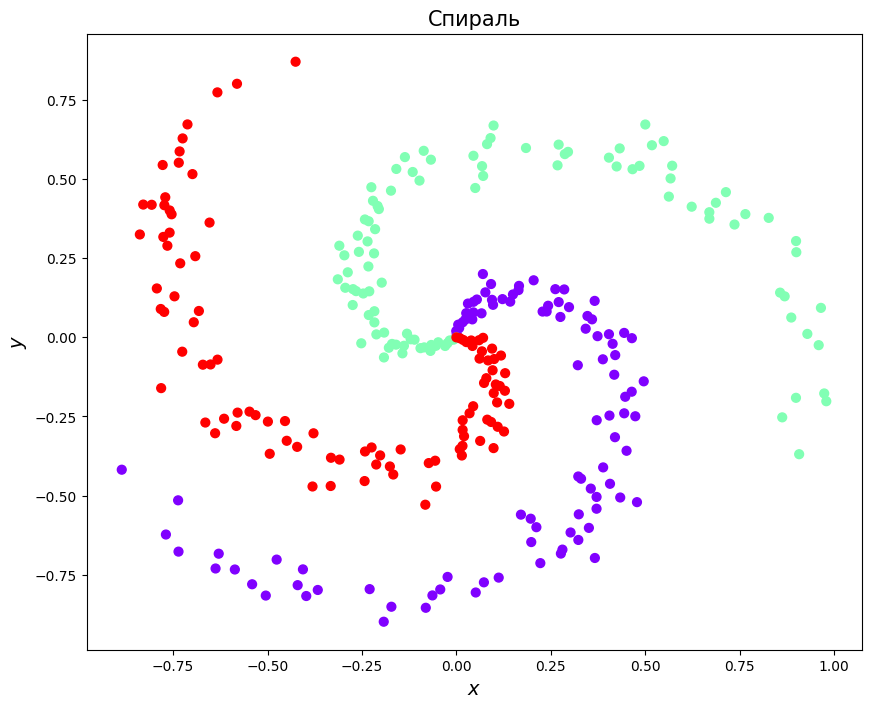

/home/daniil/study/nn-course/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/daniil/study/nn-course/.venv/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


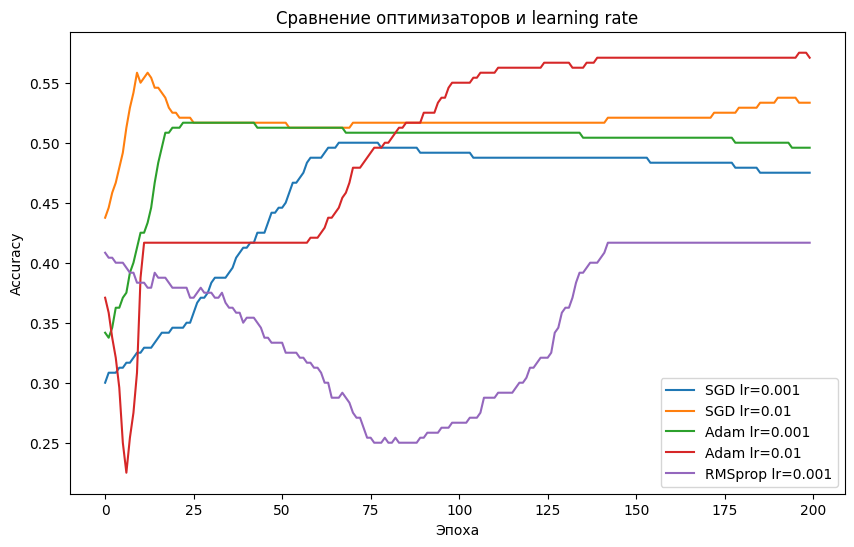

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

num_features = X.shape[1]

# Функция для обучения модели и возврата истории
def train_model(optimizer, lr, epochs=200, batch_size=64):
    model = Sequential()
    model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))
    
    if optimizer == "sgd":
        opt = optimizers.SGD(learning_rate=lr, decay=1e-6, momentum=0.9, nesterov=True)
    elif optimizer == "adam":
        opt = optimizers.Adam(learning_rate=lr)
    elif optimizer == "rmsprop":
        opt = optimizers.RMSprop(learning_rate=lr)
    else:
        raise ValueError("Неизвестный оптимизатор")
    
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, 
                        verbose=0, validation_split=0.2)
    return history

# Эксперименты
experiments = [
    ("SGD lr=0.001", "sgd", 0.001, 200),
    ("SGD lr=0.01", "sgd", 0.01, 200),
    ("Adam lr=0.001", "adam", 0.001, 200),
    ("Adam lr=0.01", "adam", 0.01, 200),
    ("RMSprop lr=0.001", "rmsprop", 0.001, 200)
]

plt.figure(figsize=(10,6))

for label, opt, lr, ep in experiments:
    hist = train_model(opt, lr, epochs=ep)
    # plt.plot(hist.history['val_accuracy'], label=label)
    plt.plot(hist.history['accuracy'], label=label)

plt.title("Сравнение оптимизаторов и learning rate")
plt.xlabel("Эпоха")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
